Importing the 'NYC-Airbnb-2023.csv' Data Set using pandas in Python

In [1]:
import numpy as np
import pandas as pd

data_frame = pd.read_csv('NYC-Airbnb-2023.csv')
data_frame.head(5)

C:\Users\vaths\AppData\Local\Temp\ipykernel_42984\3452727561.py:4: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  data_frame = pd.read_csv('NYC-Airbnb-2023.csv')


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75356,-73.98559,Entire home/apt,150,30,49,2022-06-21,0.30,3,314,1,NaN
1,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68535,-73.95512,Private room,60,30,50,2019-12-02,0.30,2,365,0,NaN
2,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80380,-73.96751,Private room,75,2,118,2017-07-21,0.72,1,0,0,NaN
3,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Midtown,40.76457,-73.98317,Private room,68,2,575,2023-02-19,3.41,1,106,52,NaN
4,5136,"Large Sunny Brooklyn Duplex, Patio + Garden",7378,Rebecca,Brooklyn,Sunset Park,40.66265,-73.99454,Entire home/apt,275,60,3,2022-08-10,0.03,1,181,1,NaN


Data Cleaning

In [2]:
data_frame.isna().sum()
data_frame.reviews_per_month = data_frame.reviews_per_month.fillna(data_frame.reviews_per_month.mode())
data_frame.isna().sum()
data_frame.drop(columns=['host_id','id'],inplace=True)
data_frame.drop_duplicates()
data_frame.head(5)

,name,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,Skylit Midtown Castle,Jennifer,Manhattan,Midtown,40.75356,-73.98559,Entire home/apt,150,30,49,2022-06-21,0.30,3,314,1,NaN
1,BlissArtsSpace!,Garon,Brooklyn,Bedford-Stuyvesant,40.68535,-73.95512,Private room,60,30,50,2019-12-02,0.30,2,365,0,NaN
2,Cozy Clean Guest Room - Family Apt,MaryEllen,Manhattan,Upper West Side,40.80380,-73.96751,Private room,75,2,118,2017-07-21,0.72,1,0,0,NaN
3,Large Furnished Room Near B'way,Shunichi,Manhattan,Midtown,40.76457,-73.98317,Private room,68,2,575,2023-02-19,3.41,1,106,52,NaN
4,"Large Sunny Brooklyn Duplex, Patio + Garden",Rebecca,Brooklyn,Sunset Park,40.66265,-73.99454,Entire home/apt,275,60,3,2022-08-10,0.03,1,181,1,NaN


In [3]:
print(data_frame.dtypes)
data_frame.describe()

name                               object
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object


,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,42931.000000,42931.000000,42931.000000,42931.000000,42931.000000,32627.000000,42931.000000,42931.000000,42931.000000
mean,40.728273,-73.943665,200.307167,18.111178,25.856001,1.168988,24.054809,140.262211,7.736507
std,0.057640,0.056627,895.082911,27.462513,56.616344,1.789675,80.867958,142.001486,18.290256
min,40.500314,-74.251907,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,40.687485,-73.981750,75.000000,2.000000,1.000000,0.140000,1.000000,0.000000,0.000000
50%,40.724040,-73.952620,125.000000,7.000000,5.000000,0.520000,1.000000,89.000000,0.000000
75%,40.762293,-73.924035,200.000000,30.000000,24.000000,1.670000,4.000000,289.000000,7.000000
max,40.911380,-73.710870,99000.000000,1250.000000,1842.000000,86.610000,526.000000,365.000000,1093.000000


Data Analysis

In [5]:
import matplotlib.pyplot as plot
import statsmodels.api as st
import seaborn as sb

Are there significant differences in average listing prices between neighborhoods in NYC?

Average Listing Prices by Neighbourhood Groups in New York City
  neighbourhood_group       price
4       Staten Island  309.037296
2           Manhattan  268.365783
1            Brooklyn  162.766829
3              Queens  128.173655
0               Bronx  117.512123
Top 5 Priced Places within Each Neighbourhood Group

Staten Island:
       neighbourhood        price
219    West Brighton  2263.000000
190   Fort Wadsworth   800.000000
215        Stapleton   383.478261
221      Willowbrook   329.000000
197  Lighthouse Hill   250.000000

Manhattan:
        neighbourhood       price
123           Tribeca  625.050505
120              SoHo  586.640379
117              NoHo  436.027027
122  Theater District  425.329268
114           Midtown  396.498625

Brooklyn:
   neighbourhood       price
53  Bergen Beach  418.304348
93   Sunset Park  405.898026
85     Navy Yard  365.909091
68         DUMBO  269.416667
63   Cobble Hill  255.514286

Queens:
        neighbourhood       price
135         Bell

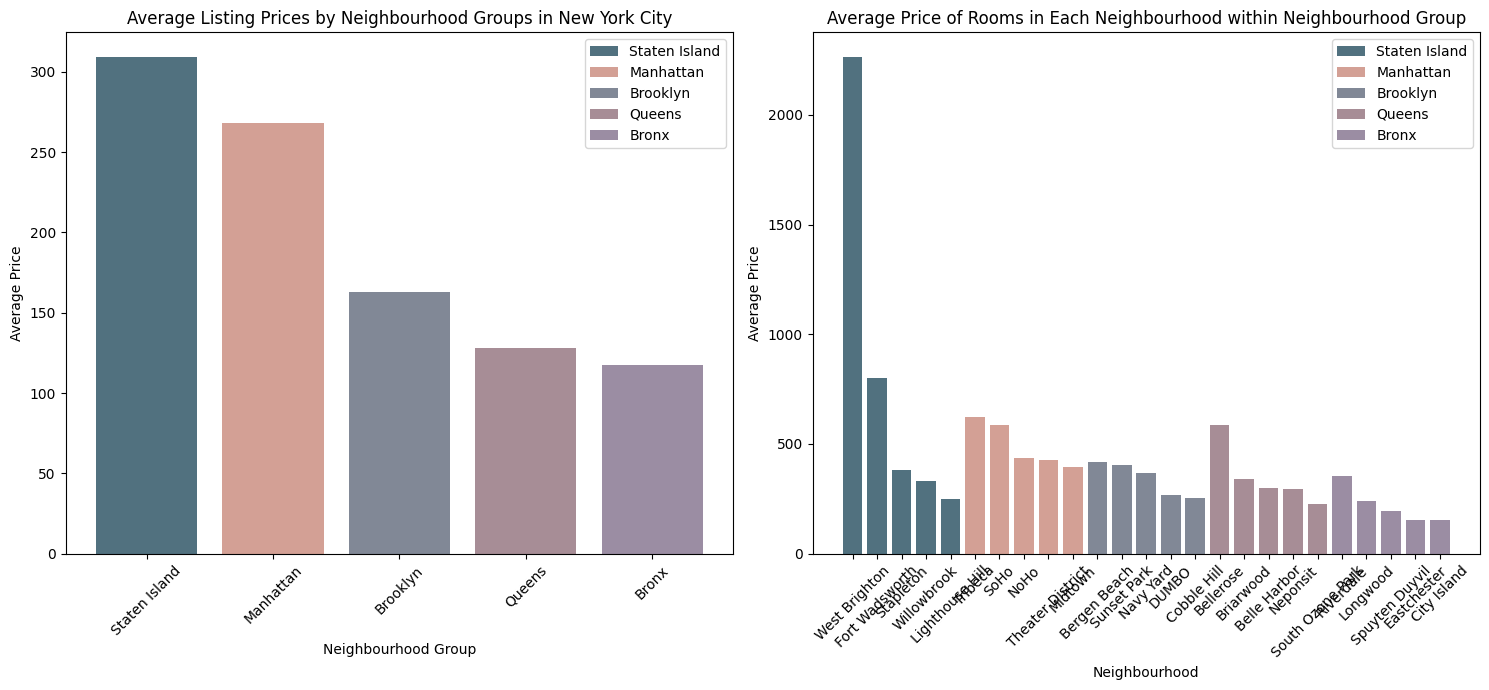

In [6]:
df = data_frame
neighborhood_avg_prices = df.groupby(['neighbourhood_group', 'neighbourhood'])['price'].mean().reset_index()
neighborhoodgroup_prices_sorted = df.groupby('neighbourhood_group')['price'].mean().reset_index()
neighborhoodgroup_prices_sorted = neighborhoodgroup_prices_sorted.sort_values(by='price', ascending=False)

print("Average Listing Prices by Neighbourhood Groups in New York City")
print(neighborhoodgroup_prices_sorted)

print("Top 5 Priced Places within Each Neighbourhood Group")
for group in neighborhoodgroup_prices_sorted['neighbourhood_group']:
    group_data = neighborhood_avg_prices[neighborhood_avg_prices['neighbourhood_group'] == group]
    top_5_places = group_data.sort_values(by='price', ascending=False).head(5)
    print(f"\n{group}:")
    print(top_5_places[['neighbourhood', 'price']])

fig, (f1, f2) = plot.subplots(1, 2, figsize=(15, 7))
colors = ['#51717f', '#d3a095', '#818896', '#a78d96', '#9b8da3']

bars = f1.bar(neighborhoodgroup_prices_sorted['neighbourhood_group'], neighborhoodgroup_prices_sorted['price'], color=colors)
f1.set_xlabel('Neighbourhood Group')
f1.set_ylabel('Average Price')
f1.set_title('Average Listing Prices by Neighbourhood Groups in New York City')
f1.tick_params(axis='x', rotation=45)
f1.legend(bars, neighborhoodgroup_prices_sorted['neighbourhood_group'], loc='upper right')

f2.set_title('Top 5 Priced Places within Each Neighbourhood Group')
for i, group in enumerate(neighborhoodgroup_prices_sorted['neighbourhood_group']):
    group_data = neighborhood_avg_prices[neighborhood_avg_prices['neighbourhood_group'] == group]
    top_5_places = group_data.sort_values(by='price', ascending=False).head(5)
    f2.bar(top_5_places['neighbourhood'], top_5_places['price'], color=colors[i], label=group)

f2.set_xlabel('Neighbourhood')
f2.set_ylabel('Average Price')
f2.set_title('Average Price of Rooms in Each Neighbourhood within Neighbourhood Group')
f2.tick_params(axis='x', rotation=45)
f2.legend()

plot.tight_layout()
plot.show()

How do prices vary across different types of accommodations (example: entire homes, private rooms, shared rooms)?

Average Price per Day by Room Type in Each Neighborhood Group:
neighbourhood_group      Bronx    Brooklyn   Manhattan      Queens  \
room_type                                                            
Entire home/apt      80.956651   75.433373   67.523886   78.065768   
Hotel room                 NaN  138.614286  212.580142  148.541667   
Private room         50.437440   47.832708   87.110572   43.314622   
Shared room          26.494444   22.716298   53.950390   49.012072   

neighbourhood_group  Staten Island  
room_type                           
Entire home/apt          68.132577  
Hotel room                     NaN  
Private room            325.128425  
Shared room                    NaN  


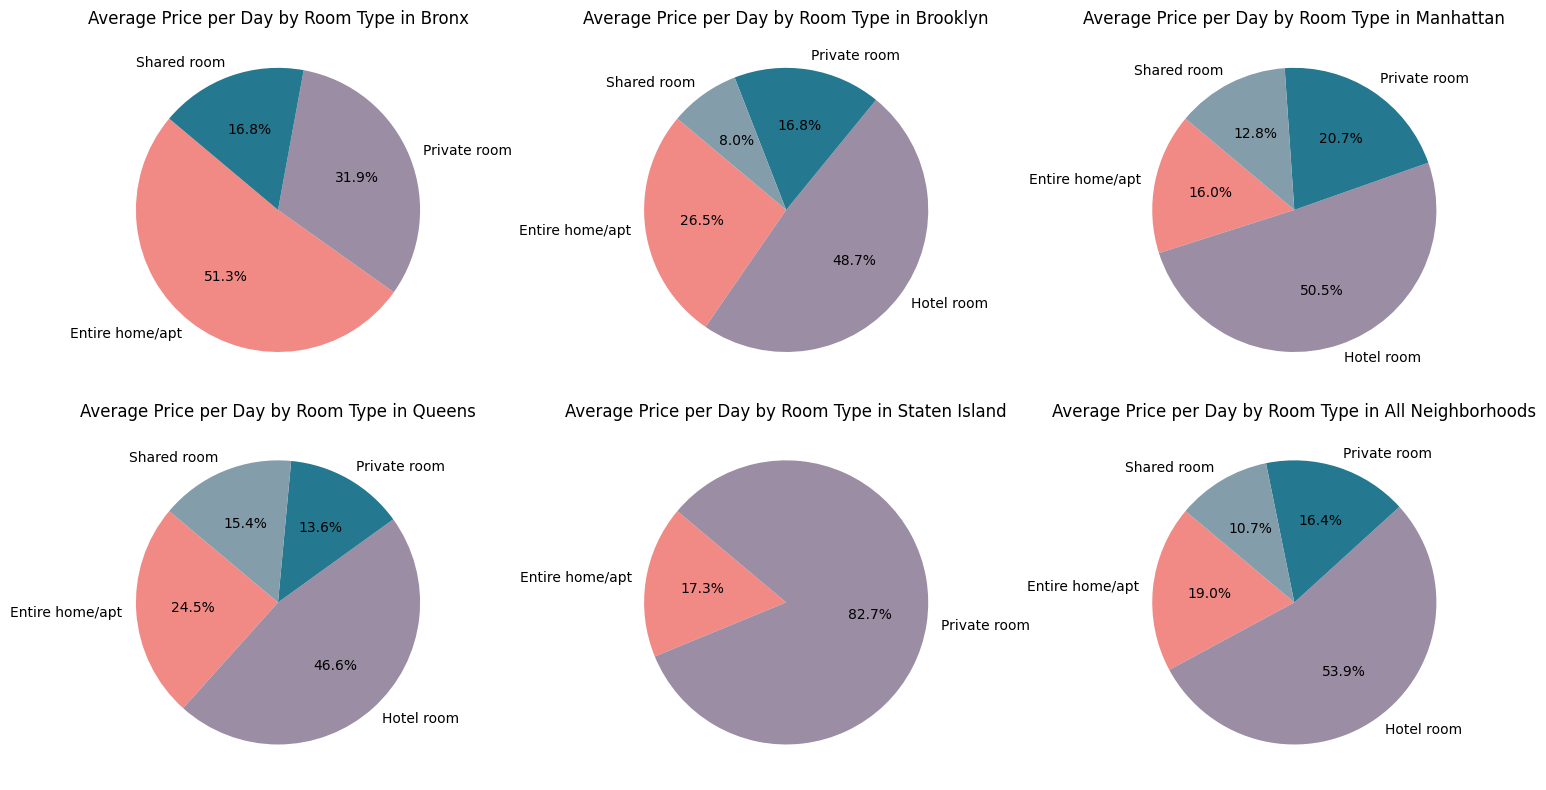

In [17]:
df = data_frame
df.fillna(0,inplace=True)
df['price_per_day'] = df['price'] / df['minimum_nights']

neighborhood_group_room_type_avg_price = df.groupby(['neighbourhood_group', 'room_type'])['price_per_day'].mean().unstack()
print("Average Price per Day by Room Type in Each Neighborhood Group:")
print(neighborhood_group_room_type_avg_price.T)

num_neighborhoods = len(df['neighbourhood_group'].unique())
num_cols = 3
num_rows = (num_neighborhoods - 1) // num_cols + 1

fig, f = plot.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 4*num_rows))
colors = ['#F18A85', '#9b8da3', '#24788F', '#849DAB', '#FCB677']

for (neighborhood_group, group_data), i in zip(df.groupby('neighbourhood_group'), f.flat):
    room_type_avg_price = group_data.groupby('room_type')['price_per_day'].mean()
    i.pie(room_type_avg_price, labels=room_type_avg_price.index, autopct='%1.1f%%', startangle=140, colors=colors)
    i.set_title(f'Average Price per Day by Room Type in {neighborhood_group}')

all_neighborhoods_data = df.groupby('room_type')['price_per_day'].mean()
i = f.flat[-1]
i.pie(all_neighborhoods_data, labels=all_neighborhoods_data.index, autopct='%1.1f%%', startangle=140, colors=colors)
i.set_title('Average Price per Day by Room Type in All Neighborhoods')
plot.tight_layout()
plot.show()

In [9]:
# Joint and Marginal Probabilities

print(neighborhood_group_room_type_avg_price)
neighborhood_group_room_type_avg_price.fillna(0, inplace=True)
neighborhood_group_room_type_avg_price = neighborhood_group_room_type_avg_price

total_sum = neighborhood_group_room_type_avg_price.values.sum()
joint_probabilities = neighborhood_group_room_type_avg_price / total_sum

print("\nJoint Probabilities:")
print(joint_probabilities)

marginal_probabilities_by_group = neighborhood_group_room_type_avg_price.sum(axis=1) / total_sum
marginal_probabilities_by_room_type = neighborhood_group_room_type_avg_price.sum(axis=0) / total_sum

print("\nMarginal Probabilities by Neighbourhood Group:")
print(marginal_probabilities_by_room_type)

print("\nMarginal Probabilities by Room Type:")
print(marginal_probabilities_by_group)

room_type            Entire home/apt  Hotel room  Private room  Shared room
neighbourhood_group                                                        
Bronx                      79.245389    0.000000     50.385278    30.080952
Brooklyn                   77.639447  121.287500     40.219845    33.156505
Manhattan                  87.354986  242.436235    125.023304    47.722714
Queens                     81.690545  148.541667     39.655790    61.549023
Staten Island              71.081463    0.000000    271.296238    99.000000

Joint Probabilities:
room_type            Entire home/apt  Hotel room  Private room  Shared room
neighbourhood_group                                                        
Bronx                       0.046414    0.000000      0.029511     0.017618
Brooklyn                    0.045473    0.071038      0.023557     0.019420
Manhattan                   0.051164    0.141994      0.073226     0.027951
Queens                      0.047846    0.087000      0.023226    

 What factors contribute to pricing variations, such as neighborhood characteristics 
or property amenities?

In [10]:
# Correlation Coefficients

df = data_frame
numerical_columns = ['price', 'latitude', 'longitude', 'minimum_nights', 'number_of_reviews', 
                     'calculated_host_listings_count', 'availability_365']

correlation_matrix = df[numerical_columns].corr()
print("Correlation Matrix:")
correlation_matrix.head()

Correlation Matrix:


,price,latitude,longitude,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
price,1.000000,0.008133,-0.058381,-0.020755,-0.016465,0.026166,0.027138
latitude,0.008133,1.000000,0.046993,0.032294,-0.042742,0.038446,-0.008511
longitude,-0.058381,0.046993,1.000000,-0.098564,0.042930,-0.085514,0.152410
minimum_nights,-0.020755,0.032294,-0.098564,1.000000,-0.138792,0.119961,-0.092420
number_of_reviews,-0.016465,-0.042742,0.042930,-0.138792,1.000000,-0.111142,0.046146


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                 3.224e+04
Date:                Tue, 16 Apr 2024   Prob (F-statistic):               0.00
Time:                        15:38:06   Log-Likelihood:            -3.0873e+05
No. Observations:               42931   AIC:                         6.175e+05
Df Residuals:                   42921   BIC:                         6.176e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

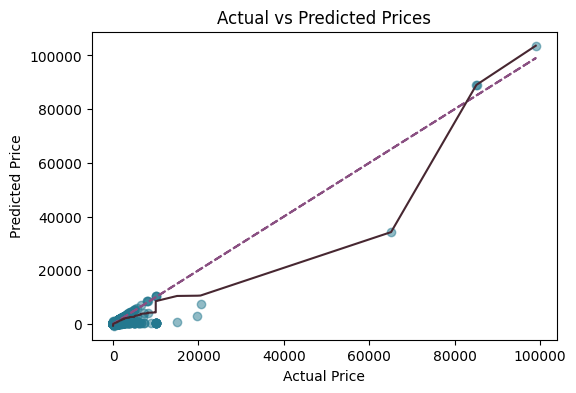

In [11]:
# Regression Analysis

df = data_frame
df_numeric = df.drop(['name', 'host_name', 'neighbourhood_group', 'neighbourhood', 'last_review', 'room_type', 'license'], axis=1)
df_numeric = df_numeric.dropna()
df_numeric = df_numeric.replace([np.inf, -np.inf], np.nan).dropna()
X = df_numeric.drop(['price'], axis=1)
y = df_numeric['price']
X = st.add_constant(X)
model = st.OLS(y, X).fit()
print(model.summary())

predictions = model.predict(X)
alpha = model.params['const']
beta = model.params.drop('const')
plot.figure(figsize=(6, 4))
plot.scatter(y, predictions, alpha=0.5, color='#24788F')
plot.plot(y, y, color='#8A5082', linestyle='--', label='Perfect Prediction')
x_values = np.linspace(min(y), max(y), 100)
y_values = alpha + np.dot(X.drop('const', axis=1), beta)

plot.plot(np.sort(y), np.sort(y_values), color='#472731', label=f'Regression Line: Price = {alpha:.2f} + {" + ".join([f"{beta_i:.2f} * {col}" for beta_i, col in zip(beta, X.columns[1:])])}')
plot.title('Actual vs Predicted Prices')
plot.xlabel('Actual Price')
plot.ylabel('Predicted Price')
plot.show()


 Are there regulatory factors impacting the pricing ?

Comparison of Average number of reviews by Neighbourhood Group:
neighbourhood_group
Bronx            1.211348
Brooklyn         0.898065
Manhattan        0.702076
Queens           1.238149
Staten Island    1.282098
Name: reviews_per_month, dtype: float64

Availability Distribution by Neighbourhood Group:
neighbourhood_group
Bronx            208.949143
Brooklyn         125.583975
Manhattan        132.807566
Queens           172.610035
Staten Island    210.419580
Name: availability_365, dtype: float64


C:\Users\vaths\AppData\Local\Temp\ipykernel_42984\2315403704.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  f2.set_xticklabels(f2.get_xticklabels(), rotation=45, ha='right')


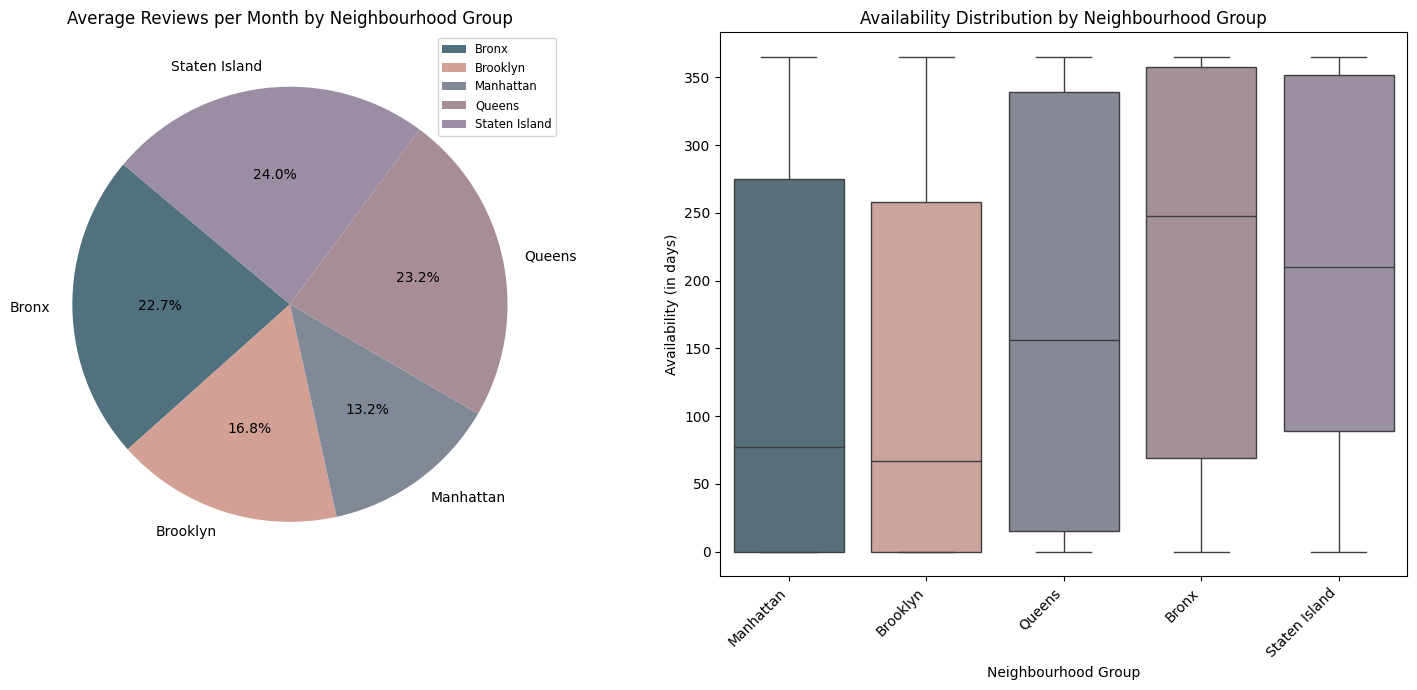

In [13]:
df = data_frame
neighborhood_reviews_avg = df.groupby('neighbourhood_group')['reviews_per_month'].mean()
labels = neighborhood_reviews_avg.index
sizes = neighborhood_reviews_avg.values

print("Comparison of Average number of reviews by Neighbourhood Group:")
print(neighborhood_reviews_avg)

print("\nAvailability Distribution by Neighbourhood Group:")
neighbourhood_availability = df.groupby('neighbourhood_group')['availability_365'].mean()
print(neighbourhood_availability)

figures, (f1, f2) = plot.subplots(1, 2, figsize=(15, 7))
colors = ['#51717f', '#d3a095', '#818896', '#a78d96', '#9b8da3']

f1.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
f1.set_title('Average Reviews per Month by Neighbourhood Group')
f1.legend(labels, fontsize="small", loc='upper right')

sb.boxplot(x='neighbourhood_group', y='availability_365', data=df, palette=colors, hue='neighbourhood_group', ax=f2, legend=False)
f2.set_title('Availability Distribution by Neighbourhood Group')
f2.set_xlabel('Neighbourhood Group')
f2.set_ylabel('Availability (in days)')
f2.set_xticklabels(f2.get_xticklabels(), rotation=45, ha='right')

plot.tight_layout()
plot.show()

 How do seasonal fluctuations affect listing prices?

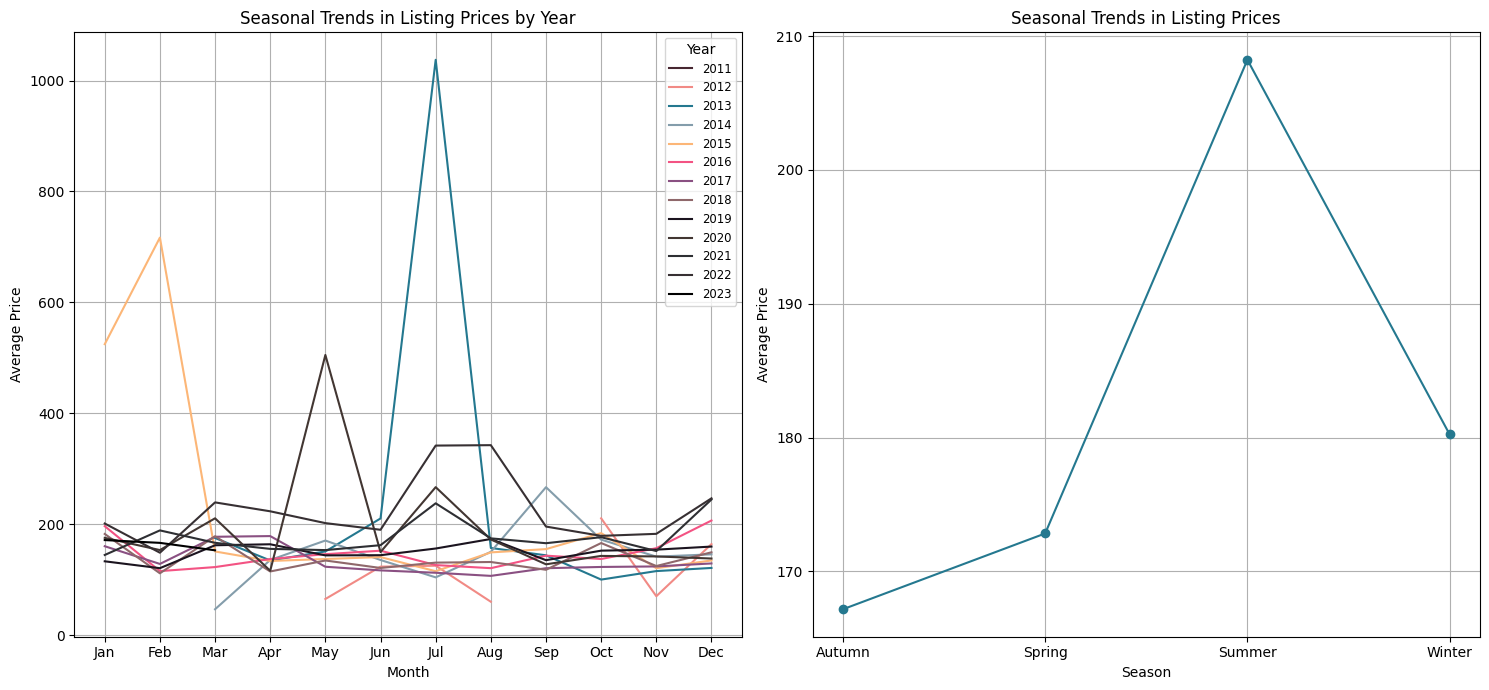

Seasonal Trends in Listing Prices

month          1           2           3           4           5           6   \
year                                                                            
2011          NaN         NaN         NaN         NaN  349.000000         NaN   
2012          NaN         NaN         NaN         NaN   65.000000  123.333333   
2013          NaN         NaN  175.000000  134.500000  150.750000  210.250000   
2014   100.000000         NaN   46.500000  135.333333  170.428571  135.333333   
2015   524.592593  716.800000  150.727273  133.555556  137.131579  140.607843   
2016   196.348039  115.292683  122.558442  137.086957  145.824561  152.107692   
2017   160.167785  128.230769  177.209302  178.464286  123.156250  116.585586   
2018   182.306977  111.327273  178.153846  114.623529  134.436975  120.952830   
2019   132.978070  120.573529  161.908046  163.686869  143.664430  143.993464   
2020   175.278830  153.238854  210.512428  115.888889  505.147059  149.622

In [14]:
df = data_frame

df['last_review'] = pd.to_datetime(df['last_review'], errors='coerce')
df.dropna(subset=['last_review'], inplace=True)

df['year'] = df['last_review'].dt.year
df['month'] = df['last_review'].dt.month
df['day'] = df['last_review'].dt.day

def season(month):
    if 3 <= month <= 5:
        return 'Spring'
    elif 6 <= month <= 8:
        return 'Summer'
    elif 9 <= month <= 11:
        return 'Autumn'
    else:
        return 'Winter'

df['season'] = df['month'].apply(season)
monthly_avg_price_by_year = df.groupby(['year', 'month'])['price'].mean().unstack()

figures, (f1, f2) = plot.subplots(1, 2, figsize=(15, 7))
colors = ['#472731', '#F18A85', '#24788F', '#849DAB', '#FCB677', '#F35383', '#8A5082', '#8F686B', '#1b141f', '#423632', '#2e2f33', '#373033','#000000']

for year, color in zip(monthly_avg_price_by_year.index, colors):
    f1.plot(monthly_avg_price_by_year.columns, monthly_avg_price_by_year.loc[year], label=str(year), color=color)

f1.set_xlabel('Month')
f1.set_ylabel('Average Price')
f1.set_title('Seasonal Trends in Listing Prices by Year')
f1.legend(title='Year', fontsize='small')
f1.grid(True)
f1.set_xticks(range(1, 13))
f1.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

seasonal_avg_price = df.groupby('season')['price'].mean()
f2.plot(seasonal_avg_price.index, seasonal_avg_price.values, marker='o', color='#24788F', label='Seasonal Trends')
f2.set_xlabel('Season')
f2.set_ylabel('Average Price')
f2.set_title('Seasonal Trends in Listing Prices')
f2.grid(True)

plot.tight_layout()
plot.show()

print('Seasonal Trends in Listing Prices\n')
print(monthly_avg_price_by_year)

What is the geographic spread of Airbnb listings across different neighborhoods in New York City?

Count of Airbnb Locations in Each Neighborhood Group:
neighbourhood_group
Brooklyn         12891
Manhattan        12517
Queens            5497
Bronx             1359
Staten Island      363
Name: count, dtype: int64


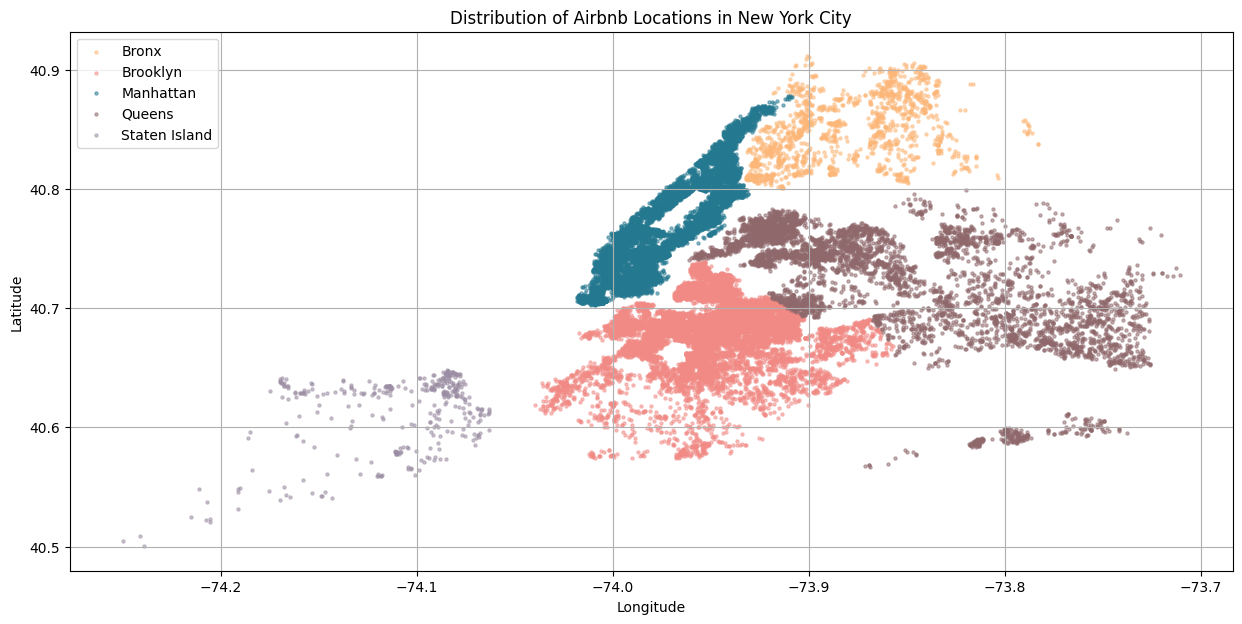

In [15]:
df = data_frame
neighborhood_counts = df['neighbourhood_group'].value_counts()
print("Count of Airbnb Locations in Each Neighborhood Group:")
print(neighborhood_counts)

colors = {'Manhattan': '#24788F', 'Brooklyn': '#F18A85', 'Queens': '#8F686B', 'Staten Island': '#9b8da3', 'Bronx': '#FCB677'}
plot.figure(figsize=(15, 7))
for group, data in df.groupby('neighbourhood_group'):
    plot.scatter(data['longitude'], data['latitude'], s=5, alpha=0.5, label=group, color=colors[group])

plot.title('Distribution of Airbnb Locations in New York City')
plot.xlabel('Longitude')
plot.ylabel('Latitude')
plot.grid(True)
plot.legend(loc='upper left')
plot.tight_layout
plot.show()